# Notes from Nielsen course

## Backpropagation

Backprob calculates the error at every neuron, therefore error for weights and biases. 

Four equations:
1. Calculate error for output neurons from output
2. Backpropagate error to lower layers
3. Calculate error for weights
4. Calculate error for biases


Advantage is that can calculate errors in a single forward and backward pass. 


## Cross entropy

So far, have been using least squares as cost function, however, this means that learning rate is small when neuron saturates. Not so for cross entropy! (Although this may be because using sigmoid functions?)


In [18]:
from sympy import *
init_printing(use_unicode = True)
CrossEntropy, y, x = symbols('CrossEntropy y x')

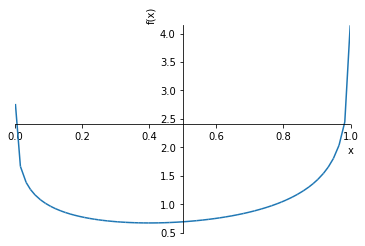

In [19]:
CrossEntropy = -(y * log(x) + (1-y) * log(1-x))
plot(CrossEntropy.subs({y:0.4}),(x,0.001,0.999));

Minimum of cross entropy is when x == y, as can be seen from the following:

\begin{align}
d(CE) &= -(y x - (1-y)/(1-x))\\
      &= -(y(1-x) - (1-y) x)/(x(1-x))\\
      &= -(y - x)/x(1-x)
\end{align}

Ok, this is cool. But the cross entropy only works so far for the weights connecting to the output layer. I'm guessing that won't work for layers further back - they get another factor of the derivative of the activation function

Incidentally, a note from Nielsen:

*"This, by the way, is part of a general pattern that we'll see through this chapter and, indeed, through much of the rest of the book. We'll develop a new technique, we'll try it out, and we'll get "improved" results. It is, of course, nice that we see such improvements. But the interpretation of such improvements is always problematic. They're only truly convincing if we see an improvement after putting tremendous effort into optimizing all the other hyper-parameters. That's a great deal of work, requiring lots of computing power, and we're not usually going to do such an exhaustive investigation. Instead, we'll proceed on the basis of informal tests like those done above. Still, you should keep in mind that such tests fall short of definitive proof, and remain alert to signs that the arguments are breaking down."*

### Testing 

Played with a 30 neuron network, training for aaaages. Get to 96.54% accuracy

### Softmax outputs

Been reading further, gets on to softmax outputs. Useful as ensures that the outputs sum to 1. Also, seems to suppress other outputs, so hand wavily, perhaps makes more "decisive"

Note that need to use log likelihood with softmax output layer to avoid learning slow down in the same way as for sigmoid above.

Note from Nielsen:

*"Given this similarity, should you use a sigmoid output layer and cross-entropy, or a softmax output layer and log-likelihood? In fact, in many situations both approaches work well. Through the remainder of this chapter we'll use a sigmoid output layer, with the cross-entropy cost. Later, in Chapter 6, we'll sometimes use a softmax output layer, with log-likelihood cost. The reason for the switch is to make some of our later networks more similar to networks found in certain influential academic papers. As a more general point of principle, softmax plus log-likelihood is worth using whenever you want to interpret the output activations as probabilities. That's not always a concern, but can be useful with classification problems (like MNIST) involving disjoint classes."*

### Overfitting

Overfitting is a big problem. Need to stop training when trainign data accuracy saturates.

Validation data is used to fit hyper parameters. Split from test data for similar overfitting reasons


## Regularization

*"Increasing the amount of training data is one way of reducing overfitting. Are there other ways we can reduce the extent to which overfitting occurs? One possible approach is to reduce the size of our network. However, large networks have the potential to be more powerful than small networks, and so this is an option we'd only adopt reluctantly.
Fortunately, there are other techniques which can reduce overfitting, even when we have a fixed network and fixed training data. These are known as regularization techniques.""*

### L2 Regularization

Add a cost term for the weights (quadratic). So weights decay 

Interesting note that not clear why should help necessarily (beyond vague feeling that smaller weights mean less sensitive to noise)

*"In fact, our networks already generalize better than one might a priori expect. A network with 100 hidden neurons has nearly 80,000 parameters. We have only 50,000 images in our training data. It's like trying to fit an 80,000th degree polynomial to 50,000 data points. By all rights, our network should overfit terribly. And yet, as we saw earlier, such a network actually does a pretty good job generalizing. Why is that the case? It's not well understood. It has been conjectured* *In Gradient-Based Learning Applied to Document Recognition, by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner (1998). that "the dynamics of gradient descent learning in multilayer nets has a `self-regularization' effect". This is exceptionally fortunate, but it's also somewhat disquieting that we don't understand why it's the case. In the meantime, we will adopt the pragmatic approach and use regularization whenever we can. Our neural networks will be the better for it.*"

### L1

L1 similar, but shrinks weight towards zero by a constant amount (not proportional to weight). So doesn't pull down big weights as much

### Dropout

Basically, also a form of regularization. Intuitive that avoids over fitting

## Activation functions

Basically, not much evidence which works best. Apparently rectified linear has been promising for image recognition. Alternative to sigmoid is tanh (similar, but allows for weights to a given neuron to increase and decrease at the same time)

## Vanishing gradient problem

Interestingly, sigmoid does seem to be much worse than relu for deep neural networks in the sense that suffers from a vanishing gradient problem - deeper into the network, gradients tend to get smaller due to saturation effect of sigmoid. However, still likely that gradients rather unstable...

### Deep neural networks

Basically, not so much interesting. Conv is useful. We basically ignore the vanishing gradient problem. Etc etc.